In [175]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [176]:
bank=pd.read_csv("E:\My folder\ExcelR(documents)\Assignments\Logistic Regression\kank.csv",sep=";")

In [177]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [178]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [179]:
# dropping the case number columns as it is not required
bank.drop(["job","marital","education","default","housing","loan","contact","day","month","pdays","previous","poutcome"],inplace=True,axis = 1)

In [180]:
bank

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


In [181]:
label_encoder = preprocessing.LabelEncoder()
bank['y']=label_encoder.fit_transform(bank['y'])
bank['y'].unique()

array([0, 1])

In [182]:
bank

,age,balance,duration,campaign,y
0,58,2143,261,1,0
1,44,29,151,1,0
2,33,2,76,1,0
3,47,1506,92,1,0
4,33,1,198,1,0
...,...,...,...,...,...
45206,51,825,977,3,1
45207,71,1729,456,2,1
45208,72,5715,1127,5,1
45209,57,668,508,4,0


In [183]:
#shape of the data
bank.shape

(45211, 5)

In [184]:
bank=bank.dropna()
bank.shape                # That means there is no NA value

(45211, 5)

<AxesSubplot:xlabel='age'>

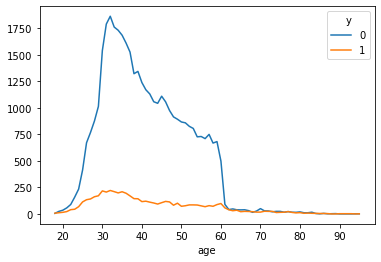

In [185]:
pd.crosstab(bank.age,bank.y).plot(kind='line')

<AxesSubplot:title={'center':'age'}, xlabel='y'>

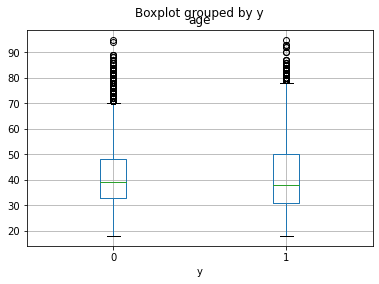

In [186]:
bank.boxplot(column='age',by='y')

In [187]:
# Dividing our data into input and output variables 
X = bank.iloc[:,0:4]
X

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1
...,...,...,...,...
45206,51,825,977,3
45207,71,1729,456,2
45208,72,5715,1127,5
45209,57,668,508,4


In [188]:
Y = bank.iloc[:,4:]
Y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [189]:
#Logistic Regression and Fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [190]:
#Predict for X dataset
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [191]:
y_pred_df= pd.DataFrame({'actual': bank.y,
                         'predicted_prob': classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Confusion Matrix 

In [192]:
#Confusion Matrix for model accuracy
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [193]:
((39342+854)/(39342+580+4435+854))*100       # Manual Method to find accuracy

88.90756674260689

In [194]:
# Classification Report(Automatic method to find accuracy,precision,recall,F1-score)
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



# ROC Curve

Text(0, 0.5, 'True Positive Rate')

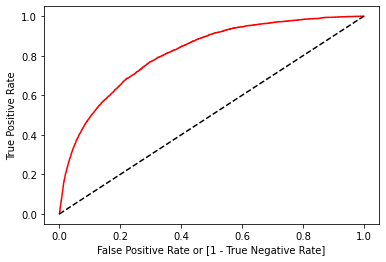

In [196]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [174]:
print('auc accuracy',auc)

auc accuracy 0.5734694329116669
